In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

In [27]:
hikes = pd.read_csv('../data/wta-parks-data.csv', index_col=0, sep='\t')

In [3]:
hikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3412 entries, 0 to 3411
Data columns (total 32 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   name                                                       3412 non-null   object 
 1   url                                                        3412 non-null   object 
 2   length                                                     2193 non-null   float64
 3   highest point                                              1746 non-null   float64
 4   gain                                                       2043 non-null   float64
 5   lat                                                        2519 non-null   float64
 6   lon                                                        2519 non-null   float64
 7   pass: Discover Pass                                        3412 non-null   int64  
 8   pass: Na

In [26]:
hikes = hikes.dropna()
hikes = hikes[hikes['reports'] > 1000]

fig = px.scatter_geo(
    lat=hikes['lat'].values,
    lon=hikes['lon'].values,
    color=hikes['reports'].values,
)

fig.add_trace(go.Choropleth(

    ))

fig.update_layout(
    geo = go.layout.Geo(
        lonaxis_range=[-125, -115.5],
        lataxis_range=[44.5, 49.5]
    ),
    # geo_scope='usa'

)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


No handles with labels found to put in legend.


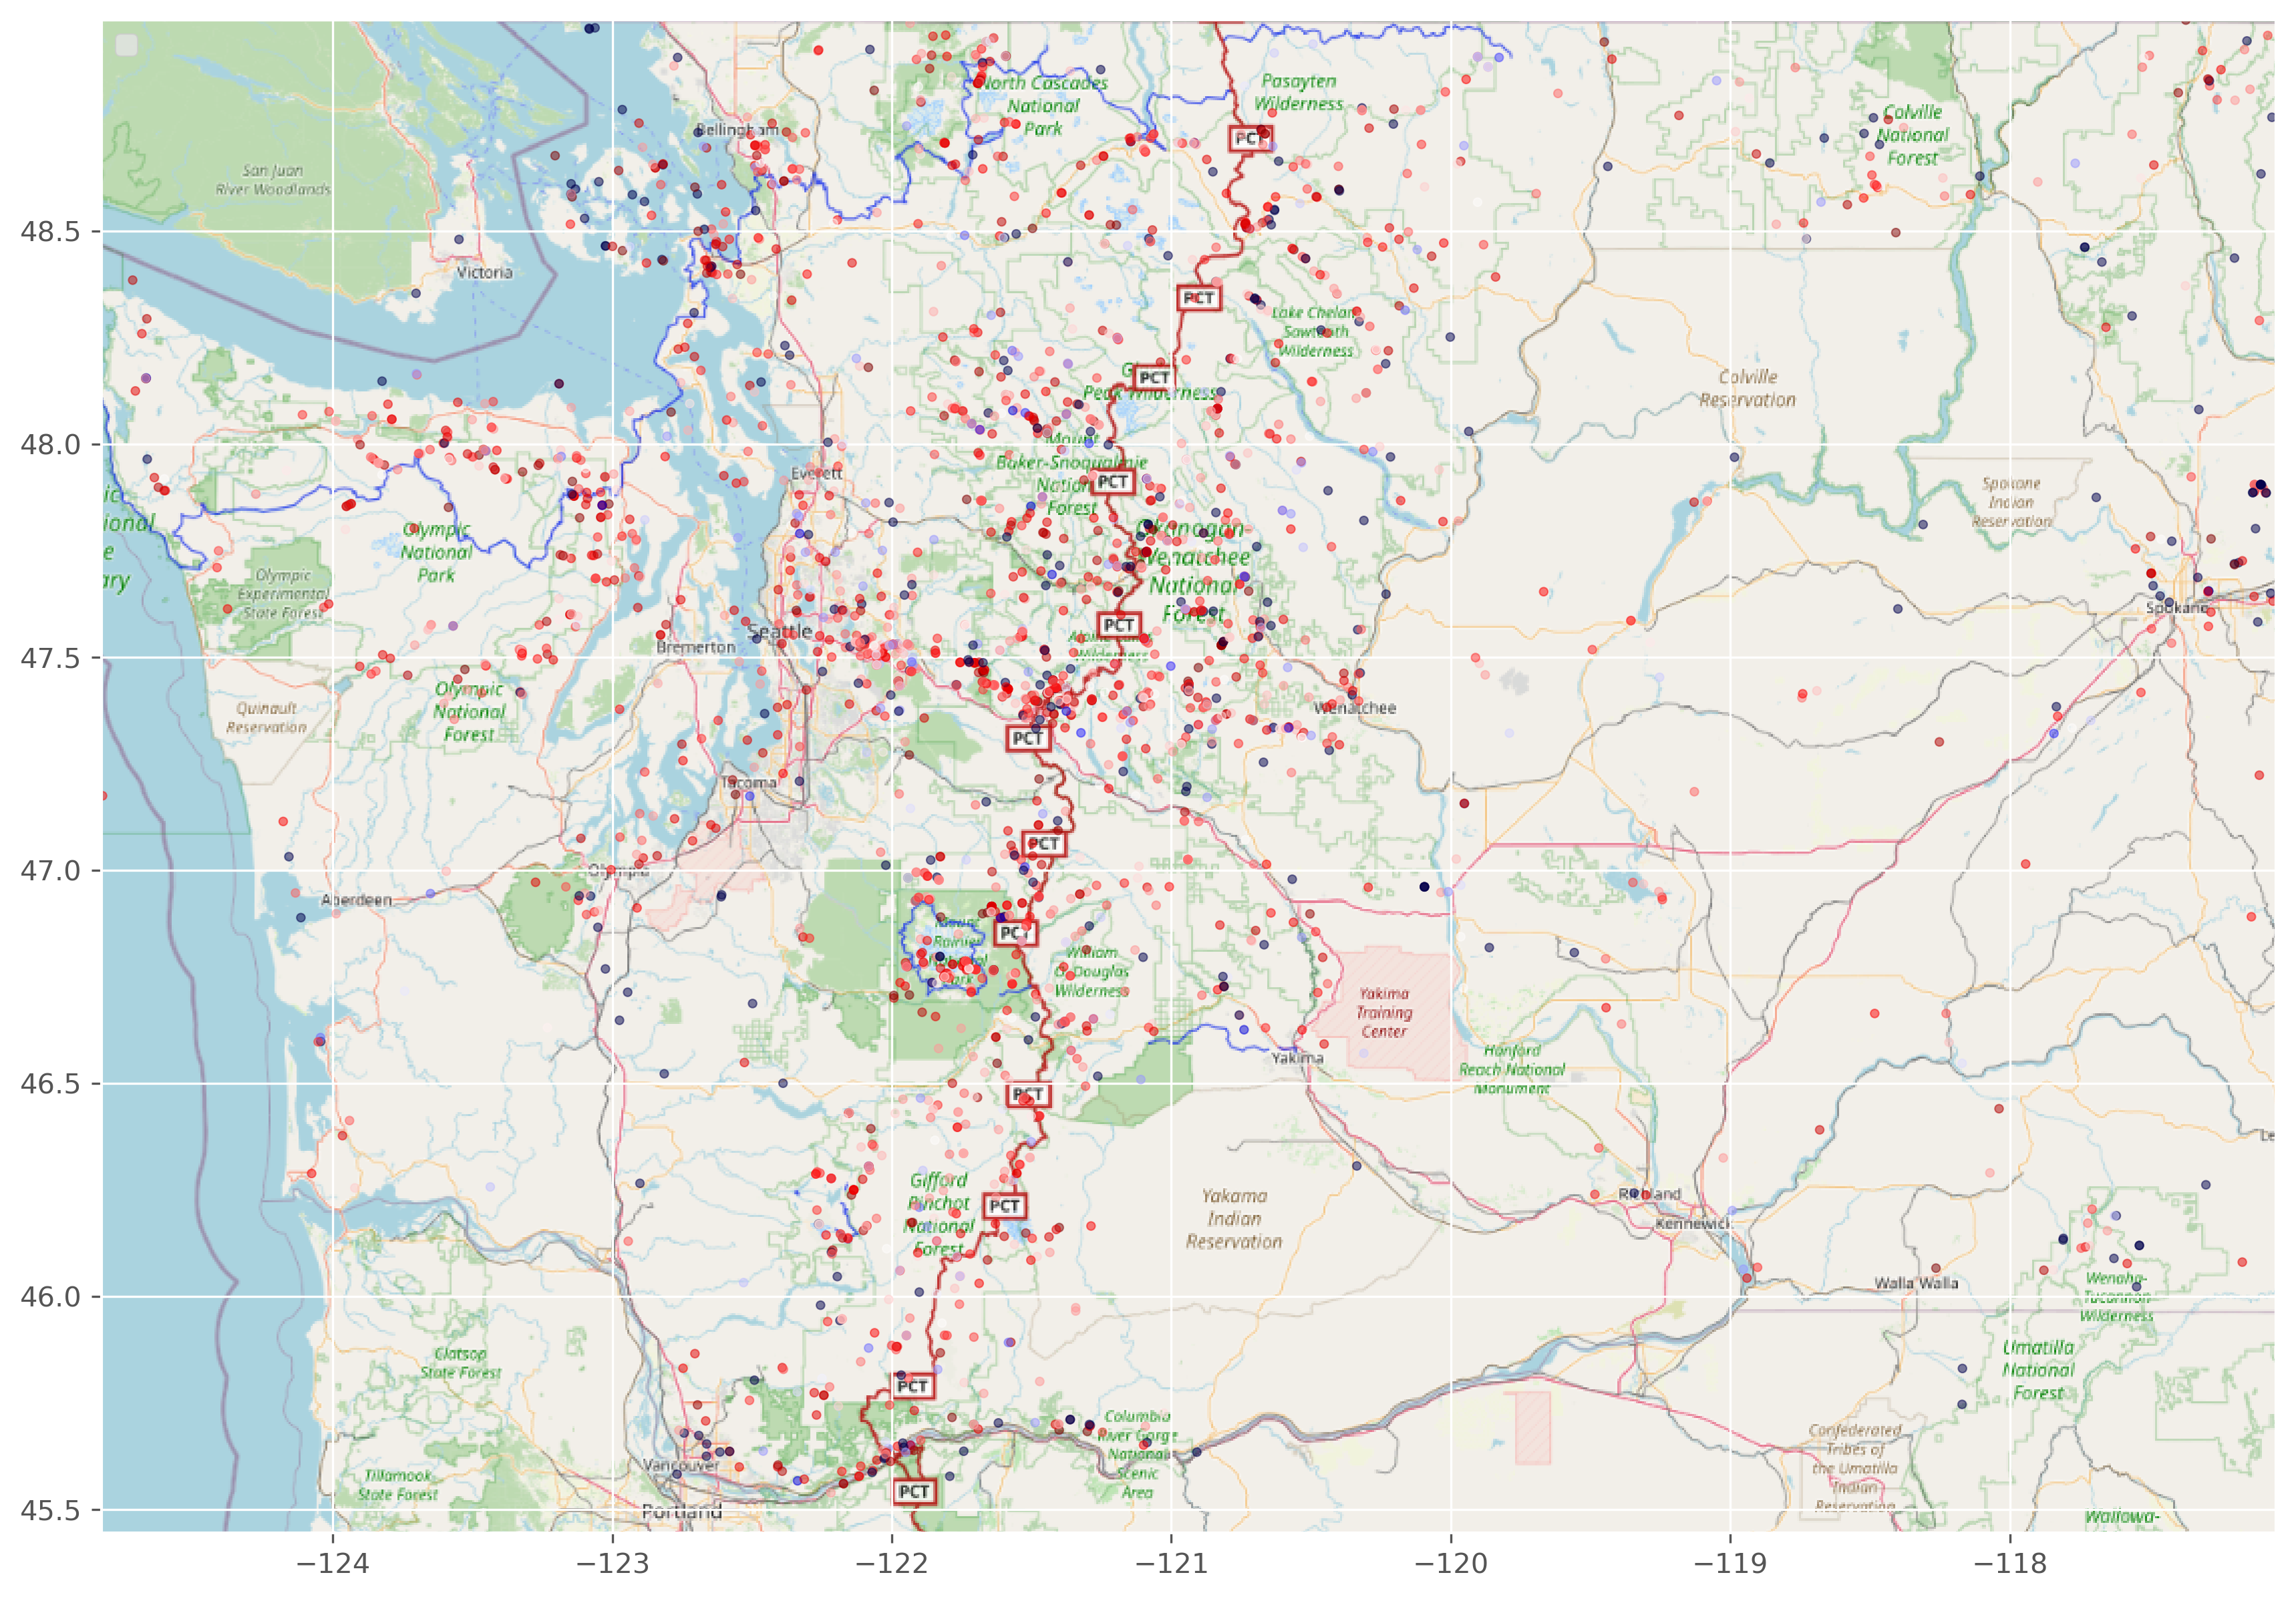

In [75]:


wa_map = plt.imread('../images/wa-map.png')
bound_box = [-124.827, -117.048, 45.445, 48.995]
latlon = hikes[['lat','lon','rating']].dropna()

fig, ax = plt.subplots(figsize = (14,10))
ax.scatter(
    latlon['lon'].values, 
    latlon['lat'].values, 
    alpha= 0.5, 
    c=latlon['rating'].values, 
    cmap='seismic',
    zorder=1,
    marker='.')
ax.set_xlim(bound_box[0],bound_box[1])
ax.set_ylim(bound_box[2],bound_box[3])
ax.imshow(wa_map, extent = bound_box, aspect='auto', zorder=0)

fig.savefig('../images/wa_map_scatter.png', dpi=300, bbox_inches='tight')